# Mini-Challenge Free Software Meetup 2018



## 1 - Intall R and required packages

Suggested alternative:
install Conda, create an environment with R essentials  (https://anaconda.org/r/r-essentials) and then run the example notebook using jupyter lab.

Quick install and some tips at Linux:

1) download miniconda installer:
>wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh

2) install
>bash Miniconda3-latest-Linux-x86_64.sh

3) Install supports for jupyter lab  (more details at "https://github.com/jupyterlab/jupyterlab")
>conda install -c conda-forge jupyterlab

4) create an environment in order to be used with R
>conda create --name py36R

5) open the environment and Install R-essentials (essentials bring with 80 DS packages tidyverse,shiny)
> source activate py36R

> conda install -c r r-essentials

> conda install nb_conda
6) Finally, open jupyter lab and run the notebook(.ipynb)

For more informations using install using another OS "https://conda.io/docs/user-guide/install/index.html"



******************************

## 2 - RUNNING

In [1]:
## Uncomment and install required packages
#install.packages("keras")
#install.packages(tidyverse)
#install.packages("tensorflow")

In [2]:
set.seed(12345)
require(keras)
require(tidyverse)
require(tensorflow)

Loading required package: keras
Warning message:
“package ‘keras’ was built under R version 3.4.4”Loading required package: tidyverse
Warning message:
“package ‘tidyverse’ was built under R version 3.4.4”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tibble’ was built under R version 3.4.4”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘readr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”Warning message:
“package ‘forcats’ was built under R version 3.4.4”── Conflicts ───────────────────────

In [3]:
# Setting the path to folders with the data set
path = "../datasets/images"
frutas <- list.files(paste0(path,"/train"))
train_path <- file.path(path,  "train")
test_path <- file.path(path,  "test")

### Path to training set
train_files<- vector()
train_labels<- vector()
train_names<- vector()
for (i in file.path(train_path,list.files(train_path))) {
        train_files<- c(train_files, paste0(i,"/",list.files(i)) )
        train_labels<- c(train_labels, strsplit(paste0(i,"/",list.files(i)), "/")%>% sapply("[",5))
}        

### Path to test set
test_files<- vector()
test_labels<- vector()
test_names<- vector()
for (i in file.path(test_path,list.files(test_path))) {
        test_files<- c(test_files, paste0(i,"/",list.files(i)) )
        test_labels<- c(test_labels, strsplit(paste0(i,"/",list.files(i)), "/")%>% sapply("[",5))
      
}        
 

In [4]:
#Amount of categories
output_n <- length(frutas)
output_n
frutas

[1] 8

[1] "apple"      "banana"     "blackberry" "blueberry"  "grapes"    
[6] "peanut"     "pear"       "strawberry"

![title](../images/fruits.png)

In [5]:
# #how look like untill here.
# print("training files")
# head(train_files, n=2)
# length(train_files)
# length(train_labels)
# print("testing files")
# head(test_files, n=2)
# length(test_files)
# length(test_labels)

### Reading images and putting into arrays

In [6]:
getImaArrays<-function(paths){
                lapply(paths,image_load, target_size = c(28, 28))%>%
                    lapply(., image_to_array)%>%
                        lapply(., "[", ,,1)%>%
                            lapply(., as.vector)%>%
                                do.call(rbind, .) 
                        }

In [7]:
### Getting arrays for each set and normalize pixel values
x_train <- getImaArrays(train_files) / 255
dim(x_train)
x_test <- getImaArrays(test_files) / 255
dim(x_test)

[1] 12800   784

[1] 1600  784

### Randomization of datasets

In [8]:
### random sort
set.seed(12345)
train_idx<- sample(1:nrow(x_train)) 
x_train<- x_train[train_idx,]
train_labels<- train_labels[train_idx]
train_files<- train_files[train_idx]

set.seed(12345)
test_idx<- sample(1:nrow(x_test)) 
x_test<- x_test[test_idx,]
test_labels<- test_labels[test_idx]
test_files<- test_files[test_idx]

In [9]:
# # Category names recodification
levels= c('apple', 'banana', 'blackberry', 'blueberry', 'grapes', 'peanut', 'pear', 'strawberry')
dict<-bind_cols(as_tibble(0:(length(levels)-1) )%>%rename(id= value),
                 as_tibble(levels)%>%rename(name=value)  )
dict

id name      
1 0  apple     
2 1  banana    
3 2  blackberry
4 3  blueberry 
5 4  grapes    
6 5  peanut    
7 6  pear      
8 7  strawberry

In [10]:
# Transform categories to dummy
y_train <- to_categorical( (as.numeric(factor(train_labels, level=levels))-1) , 8)
y_test <- to_categorical( ( as.numeric(factor(test_labels, level=levels))-1) , 8) 


****************************






# Option 1 - Simple Linear Model


In [11]:
#Settings
epochs <- 15
batch_size <- 128

Notes: 
- usue of "[softmax](https://en.wikipedia.org/wiki/Softmax_function)" activation function 
- The batch size defines the number of samples that will be propagated through the network.

In [12]:
set.seed(12345)
model <- keras_model_sequential()
model%>%
    layer_dense(output_n , input_shape = c(784)) %>% 
    layer_activation('softmax')

In [13]:
print(model)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 8)                       6280        
________________________________________________________________________________
activation_1 (Activation)           (None, 8)                       0           
Total params: 6,280
Trainable params: 6,280
Non-trainable params: 0
________________________________________________________________________________




In [14]:
# Compile model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

In [15]:
# Train model
history <- model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = 0.2,
  verbose=1, shuffle=FALSE
)

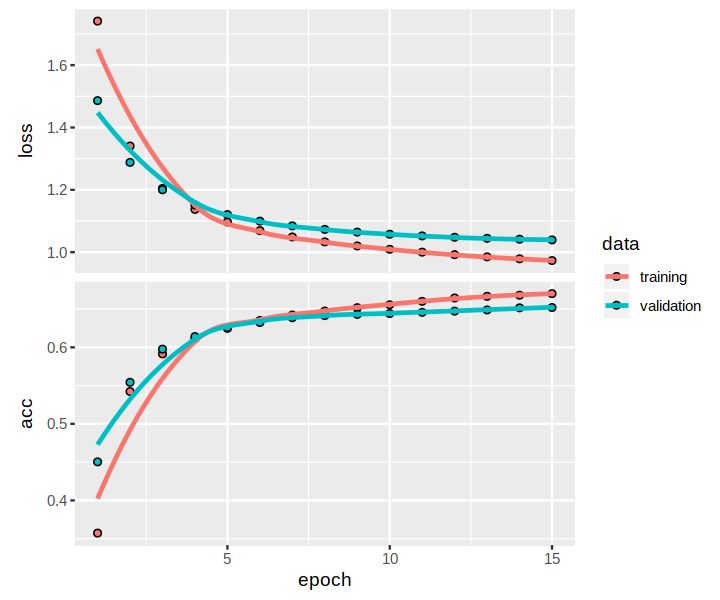

In [16]:
### Traning vs Testing performance (trade - off)
options(repr.plot.width=6, repr.plot.height=5)
plot(history)

In [17]:
scores <- model %>% evaluate(
  x_test, y_test, verbose = 0
)
# Output metrics
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')

Test loss: 1.083422 
Test accuracy: 0.623125 


****************************************








# Option 2 - Multi Layer Perceptron (MLP)

In [18]:
#Settings
epochs <- 15
batch_size <- 128

In [19]:
model <- keras_model_sequential()

model%>%
    layer_dense(128,input_shape = c(784))%>%
         layer_activation('tanh')%>%
    layer_dense(output_n ) %>% 
        layer_activation('softmax')

In [20]:
print(model)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_2 (Dense)                     (None, 128)                     100480      
________________________________________________________________________________
activation_2 (Activation)           (None, 128)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 8)                       1032        
________________________________________________________________________________
activation_3 (Activation)           (None, 8)                       0           
Total params: 101,512
Trainable params: 101,512
Non-trainable params: 0
________________________________________________________________________________




In [21]:
# Compile model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

In [22]:
# Train model
history <- model %>% fit(
          x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = 0.2,
          verbose=1
)

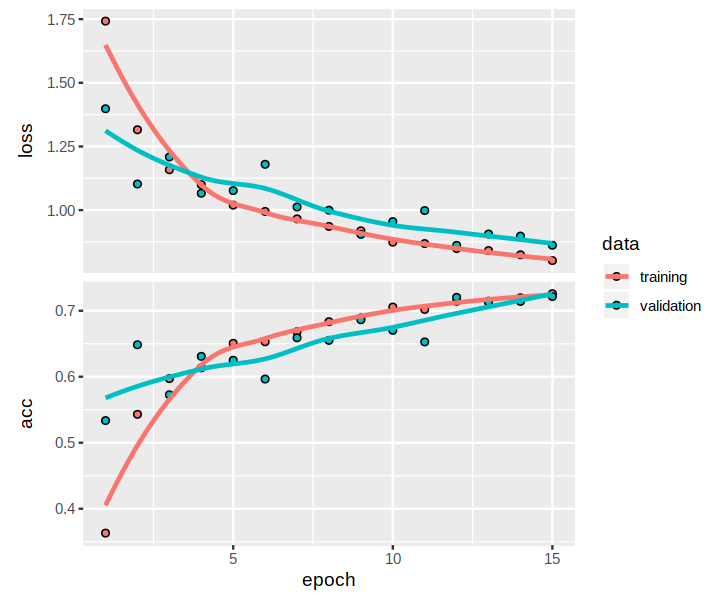

In [23]:
### Traning vs Testing performance (trade - off)
options(repr.plot.width=6, repr.plot.height=5)
plot(history)

In [24]:
scores <- model %>% evaluate(
  x_test, y_test, verbose = 0
)
# Output metrics
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')

Test loss: 0.8967518 
Test accuracy: 0.7 


###  Introducing some changes to improve 
- "tanh" -> "[relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)".
- Introducing "[dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks)" to control the "[overffiting](https://en.wikipedia.org/wiki/Overfitting)".
- Adding a one more "hidden layer"
- increasing the amount of generations (epochs")

In [25]:
#Settings
epochs <- 50
batch_size <- 128

In [26]:
model <- keras_model_sequential()

model%>%
    layer_dense(516,input_shape = c(784))%>%
         layer_activation('relu')%>%
             layer_dropout(rate = 0.2) %>%
    layer_dense(128)%>%
         layer_activation('relu')%>%
             layer_dropout(rate = 0.2) %>%
    layer_dense(output_n ) %>% 
        layer_activation('softmax')

In [27]:
# Compile model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

In [28]:
# Train model
history <- model %>% fit(
         x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = 0.2,
             verbose=1
)

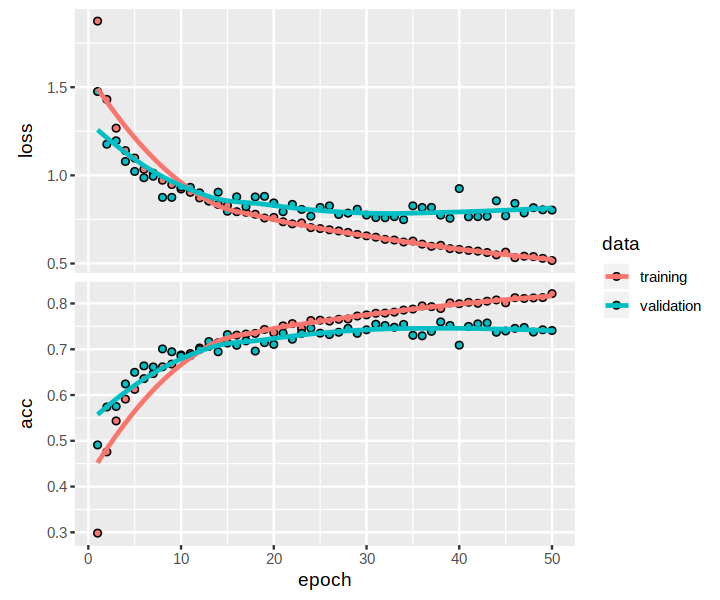

In [29]:
### Traning vs Testing performance (trade - off)
options(repr.plot.width=6, repr.plot.height=5)
plot(history)

In [30]:
scores <- model %>% evaluate(
 x_test, y_test, verbose = 0
)
# Output metrics
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')

Test loss: 0.7930387 
Test accuracy: 0.7425 


********************************

# Option 3 - Convolutional Neural Networks (CNN)

## LENET -5 Architecture

![title](../images/leNet-5.png)


Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner proposed a neural network architecture for handwritten and machine-printed character recognition in 1990’s which they called LeNet-5. 
he LeNet-5 architecture consists of two sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier.
The input plane receives images of characters that are approximately size normalized and centere.  Each unit in a layer receives inputs from a set of units located in a small neighborhood (local receptive fields LRF). With local receptive fields neurons can extract elementary visual features such as oriented edges, endpoints, corners. These features
are then combined by the subsequent layers in order to detect higher order features.

In [31]:
# Settings
epochs <- 15
batch_size <- 128

### Reshapping the Arrays in order to be used in the CNN

In [32]:
#Input image dimensions
img_rows <- 28
img_cols <- 28
#Redefine  dimension of train/test inputs
x_train <- array_reshape(x_train, c(nrow(x_train), img_rows, img_cols, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), img_rows, img_cols, 1))
input_shape <- c(img_rows, img_cols, 1)

## Implementing Original LENET-5

In [33]:
model <- keras_model_sequential()
# add layers
model %>% 
  # First layer:
  layer_conv_2d(filter =6, kernel_size = c(5,5), padding = 'same', input_shape =input_shape ) %>%
       layer_activation('tanh') %>%
  # Second hidden layer
  layer_average_pooling_2d(pool_size = c(2,2) )  %>%
  # Third hidden layer  
  layer_conv_2d(filter = 16, kernel_size= c(5,5), padding = 'same') %>%
       layer_activation('tanh') %>%
  # Fourth hidden layer
  layer_average_pooling_2d(pool_size = c(2,2)) %>%
  # Flatten output into feature vector and feed into dense layer
  layer_flatten() %>%
  # Here start a MLP with two hidden layers
  layer_dense(120) %>%
        layer_activation('tanh') %>%
  layer_dense(84) %>%
        layer_activation('tanh') %>%
  # Outputs from dense layer are projected onto output layer
  layer_dense(output_n) %>% 
  layer_activation('softmax')

In [34]:
print(model)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 28, 28, 6)               156         
________________________________________________________________________________
activation_7 (Activation)           (None, 28, 28, 6)               0           
________________________________________________________________________________
average_pooling2d_1 (AveragePooling (None, 14, 14, 6)               0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 14, 14, 16)              2416        
________________________________________________________________________________
activation_8 (Activation)           (None, 14, 14, 16)              0           
________________________________________________________________________________
average_pooling2d_2 (A

In [35]:
# Compile model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

In [36]:
# Train model
history <- model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = 0.2,
     verbose=1
)

### Traning vs Testing trade - off

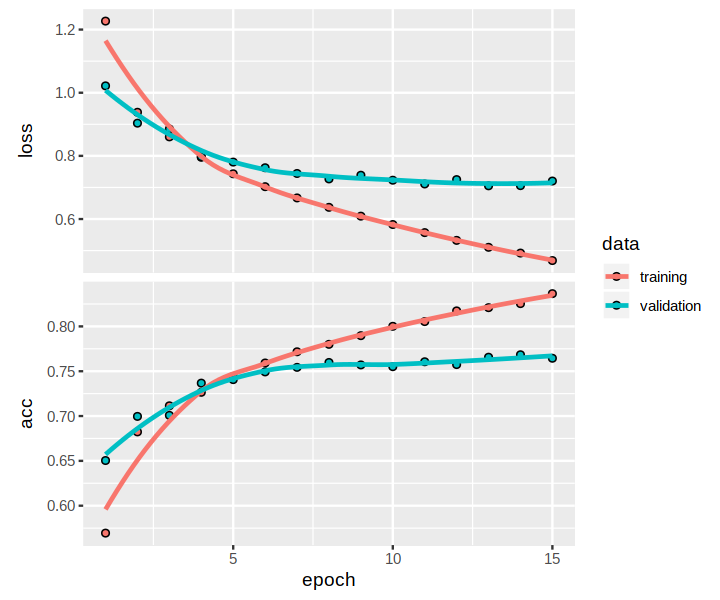

In [37]:
### Traning vs Testing performance (trade - off)
options(repr.plot.width=6, repr.plot.height=5)
plot(history)

In [38]:
scores <- model %>% evaluate(
  x_test, y_test, verbose = 0
)

In [39]:
# Output metrics
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')

Test loss: 0.7567083 
Test accuracy: 0.749375 


********************************

###  Introducing some changes to improve 

- "tanh" -> "[relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)".
- increase te amount of generations.
- introducing "[dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks)"  rate.

In [40]:
epochs <- 50

In [41]:
model <- keras_model_sequential()
# add layers
model %>% 
# First layer:
layer_conv_2d(filter =6, kernel_size = c(5,5), padding = 'same', input_shape =input_shape ) %>%
   layer_activation('relu') %>%
# Second hidden layer
layer_average_pooling_2d(pool_size = c(2,2) )  %>%
# Third hidden layer  
layer_conv_2d(filter = 16, kernel_size= c(5,5), padding = 'same') %>%
   layer_activation('relu') %>%
# Fourth hidden layer
layer_average_pooling_2d(pool_size = c(2,2)) %>%
# Flatten max filtered output into feature vector 
# and feed into dense layer
layer_flatten() %>%
layer_dense(518) %>%
    layer_activation('relu') %>%
        layer_dropout(0.65) %>%
layer_dense(128) %>%
    layer_activation('relu') %>%
        layer_dropout(0.65) %>%
# Outputs from dense layer are projected onto output layer
layer_dense(output_n) %>% 
layer_activation('softmax')


In [42]:
print(model)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_3 (Conv2D)                   (None, 28, 28, 6)               156         
________________________________________________________________________________
activation_12 (Activation)          (None, 28, 28, 6)               0           
________________________________________________________________________________
average_pooling2d_3 (AveragePooling (None, 14, 14, 6)               0           
________________________________________________________________________________
conv2d_4 (Conv2D)                   (None, 14, 14, 16)              2416        
________________________________________________________________________________
activation_13 (Activation)          (None, 14, 14, 16)              0           
________________________________________________________________________________
average_pooling2d_4 (A

In [43]:
# Compile model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

In [44]:
# Train model
history <- model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = 0.2,
     verbose=1
)

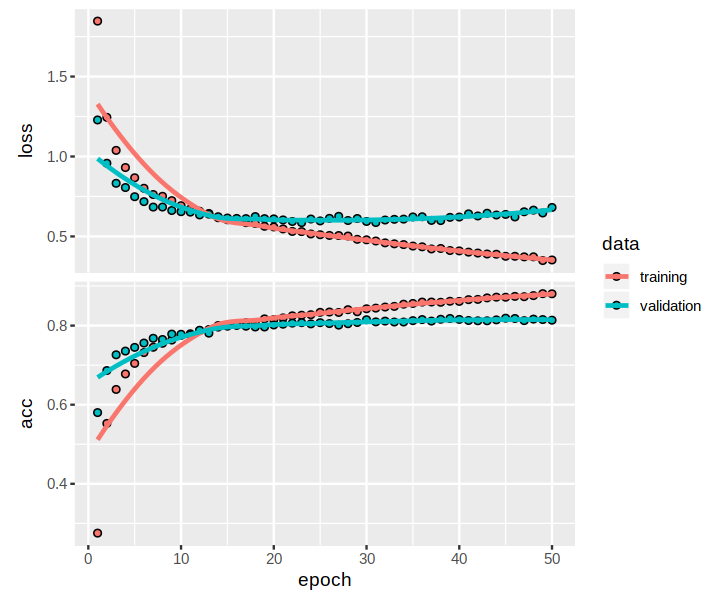

In [45]:
### Traning vs Testing performance (trade - off)
options(repr.plot.width=6, repr.plot.height=5)
plot(history)

In [46]:
scores <- model %>% evaluate(
  x_test, y_test, verbose = 0
)

In [47]:
# Output metrics
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')

Test loss: 0.7301598 
Test accuracy: 0.79875 


*************************

# Results Analysis of the CNN model

In [48]:
results<- as_tibble((as.numeric(factor(test_labels, level=levels))-1))%>%rename(observed= value)%>%
            bind_cols(., model%>% predict_classes(x_test)%>%as_tibble()%>%rename(predicted= value) )%>%
                     bind_cols(., as_tibble(test_files) )

In [49]:
results<- results%>%#mutate(file= sapply("[",5))%>%
                rename(file=value)                      

In [50]:
head(results)

observed predicted
1 5        5        
2 7        7        
3 6        6        
4 7        7        
5 3        4        
6 1        1        
  file                                                                        
1 ../datasets/images/test/peanut/c69f29d6-49b1-447c-a970-6ddf874f808b.jpeg    
2 ../datasets/images/test/strawberry/00c9cc0e-e768-4a0a-832b-b64f3e948327.jpeg
3 ../datasets/images/test/pear/12edfe39-0259-4c30-9ac8-464f0ee8c44f.jpeg      
4 ../datasets/images/test/strawberry/0b66af01-f468-4c8d-a516-47743d4abfa5.jpeg
5 ../datasets/images/test/blueberry/97cf0f3d-a38e-4fe4-8f4c-fcfeb9cbdb52.jpeg 
6 ../datasets/images/test/banana/54a39c7b-dc82-4d7a-9ce9-7a6f6ef817b1.jpeg

In [51]:
#select some number of images to analyze
n_img = 8

In [52]:
dict

id name      
1 0  apple     
2 1  banana    
3 2  blackberry
4 3  blueberry 
5 4  grapes    
6 5  peanut    
7 6  pear      
8 7  strawberry

### Checking nice predictions

In [53]:
resOK<-results%>%
            filter(observed==predicted)%>%
                        sample_n(n_img)%>%
                                separate(file, c("a","b","c","d","f","g"), sep="/", remove =FALSE)%>%
                                    select(observed,predicted,file,f)%>%rename(obs=f)%>%
                                            left_join(., dict, by=c("predicted"="id"))%>%
                                                        rename(pred= name) 
resOK

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

observed predicted
1 5        5        
2 5        5        
3 0        0        
4 1        1        
5 7        7        
6 7        7        
7 4        4        
8 2        2        
  file                                                                        
1 ../datasets/images/test/peanut/121c6575-a542-469a-a35a-63df1ed0edca.jpeg    
2 ../datasets/images/test/peanut/ca36e0c2-28eb-4418-88f7-1818b6078d0c.jpeg    
3 ../datasets/images/test/apple/904c1acf-e10e-433c-805b-291870559642.jpeg     
4 ../datasets/images/test/banana/e2a1f734-2b51-40b8-b899-9f3cb846f22c.jpeg    
5 ../datasets/images/test/strawberry/8577c37b-d8cb-4ce3-ac4d-3361061af08a.jpeg
6 ../datasets/images/test/strawberry/2d37a2b3-2e82-4d7d-8ec2-3d9ff2a0ab12.jpeg
7 ../datasets/images/test/grapes/15ab33fe-ac32-42f7-baee-0026cc8a3073.jpeg    
8 ../datasets/images/test/blackberry/f016225e-003e-4abd-a4eb-5b0b4e29c8a2.jpeg
  obs        pred      
1 peanut     peanut    
2 peanut     peanut    
3 apple      apple     
4 banana     banana    
5 strawberry strawberry
6 strawberry strawberry
7 grapes     grapes    
8 blackberry blackberry

[1] "observed vs predicted"


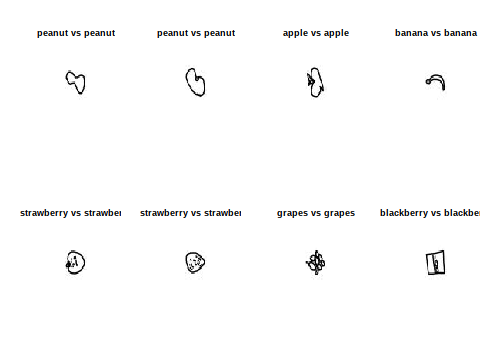

In [54]:
rows=2
cols=4
options(repr.plot.width=4, repr.plot.height=3)
graphics::layout(matrix(c(1:n_img), rows, cols, byrow = TRUE))
  for (i in 1:n_img) {
    path <- as.character(resOK$file[i])
    img<- image_to_array( (image_load(path,target_size = c(28, 28))) )[,,1]
    image(matrix(img, ncol=28 ,nrow=28),axes = FALSE, col = grey(seq(0, 1, length = 256)) )
    title(main = paste0( resOK$obs[i]," vs ", resOK$pred[i] ), cex.main=0.65 )
  }
print("observed vs predicted")

### Checking wrong predictions

In [55]:
resBAD<-results%>%
            filter(observed!=predicted)%>%
                        sample_n(n_img)%>%
                                separate(file, c("a","b","c","d","f", "g"), sep="/", remove =FALSE)%>%
                                    select(observed,predicted,file,f)%>%rename(obs=f)%>%
                                            left_join(., dict, by=c("predicted"="id"))%>%
                                                        rename(pred= name) 
resBAD

observed predicted
1 3        7        
2 0        7        
3 1        5        
4 3        4        
5 6        4        
6 3        4        
7 4        3        
8 4        2        
  file                                                                       
1 ../datasets/images/test/blueberry/213d942b-8574-44d6-8a5a-cec5f0b1ae01.jpeg
2 ../datasets/images/test/apple/66cc3a73-8573-4e82-92ef-3cc9f22eaa7e.jpeg    
3 ../datasets/images/test/banana/d08a7426-9c23-4ef9-96eb-c884f6ee38a7.jpeg   
4 ../datasets/images/test/blueberry/7d4ea711-1289-4b57-afb2-eae6a483bfcb.jpeg
5 ../datasets/images/test/pear/d319c7bc-6a4f-4092-bdc6-972e584b30bf.jpeg     
6 ../datasets/images/test/blueberry/97cf0f3d-a38e-4fe4-8f4c-fcfeb9cbdb52.jpeg
7 ../datasets/images/test/grapes/c407d1d4-a751-4b02-97cb-de6186e8e2c5.jpeg   
8 ../datasets/images/test/grapes/277b22f2-2b98-4a93-abfe-aca608e5774d.jpeg   
  obs       pred      
1 blueberry strawberry
2 apple     strawberry
3 banana    peanut    
4 blueberry grapes    
5 pear      grapes    
6 blueberry grapes    
7 grapes    blueberry 
8 grapes    blackberry

[1] "observed vs predicted"


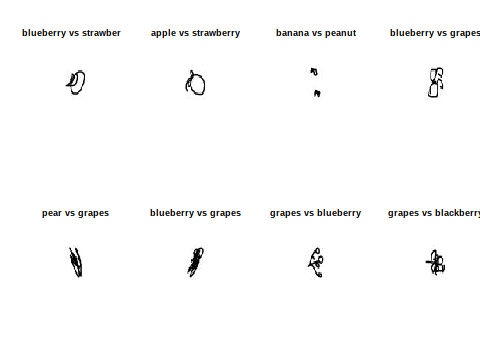

In [56]:
rows=2
cols=4
options(repr.plot.width=4, repr.plot.height=3)
graphics::layout(matrix(c(1:n_img), rows, cols, byrow = TRUE))
  for (i in 1:n_img) {
    path <- as.character(resBAD$file[i])
    img<- image_to_array( (image_load(path,target_size = c(28, 28))) )[,,1]
    image(matrix(img, ncol=28 ,nrow=28),axes = FALSE, col = grey(seq(0, 1, length = 256)) )
    title(main = paste0( resBAD$obs[i]," vs ", resBAD$pred[i] ), cex.main=0.65 )
  }
print("observed vs predicted")

In [57]:
res<-results%>%
         separate(file, c("a","b","c","d","f","g"), sep="/", remove =FALSE)%>%
                        select(observed,predicted,file,f)%>%rename(obs=f)%>%
                                left_join(., dict, by=c("predicted"="id"))%>%
                                            rename(pred= name) 

### Confusion Matrix

In [58]:
ConfMat<-as.data.frame.matrix(table(res$obs, res$pred))
ConfMat

apple banana blackberry blueberry grapes peanut pear strawberry
apple      173     0      0         11         1      0     10    5       
banana       0   177      3          2        11      5      2    0       
blackberry   1     0    126          8        53      6      1    5       
blueberry   25     3     12        123        25      1      3    8       
grapes       0     4     21          5       166      2      2    0       
peanut       0     4      6          9         4    168      8    1       
pear        10     0      3          3         6      7    169    2       
strawberry   7     2      7          2         4      2      0  176

### Visualization of the Confusion Matrix

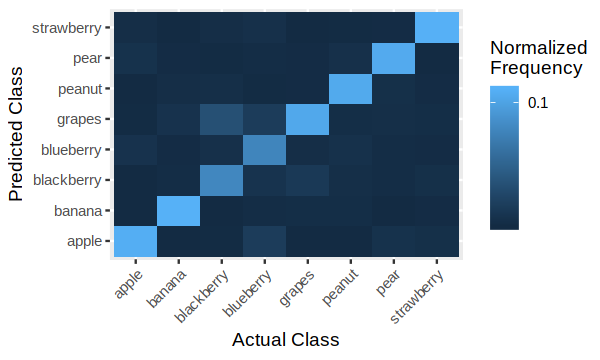

In [59]:
confusion <- as.data.frame(prop.table(table(res$obs, res$pred)))%>%
                    mutate()
options(repr.plot.width=5, repr.plot.height=3)
plot <- ggplot(confusion)
plot + geom_tile(aes(x=Var1, y=Var2, fill=Freq)) +
        scale_x_discrete(name="Actual Class") + 
            scale_y_discrete(name="Predicted Class") + 
                scale_fill_gradient(breaks=seq(from=-.5, to=4, by=.2)) +
                        labs(fill="Normalized\nFrequency")+
                              theme(axis.text.x=element_text(angle=45, hjust=1))

### More in detail Statistics

In [60]:
require(caret)
confusionMatrix(as.factor(res$pred), as.factor(res$obs))

Loading required package: caret
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:tensorflow’:

    train

The following object is masked from ‘package:purrr’:

    lift



Confusion Matrix and Statistics

            Reference
Prediction   apple banana blackberry blueberry grapes peanut pear strawberry
  apple        173      0          1        25      0      0   10          7
  banana         0    177          0         3      4      4    0          2
  blackberry     0      3        126        12     21      6    3          7
  blueberry     11      2          8       123      5      9    3          2
  grapes         1     11         53        25    166      4    6          4
  peanut         0      5          6         1      2    168    7          2
  pear          10      2          1         3      2      8  169          0
  strawberry     5      0          5         8      0      1    2        176

Overall Statistics
                                          
               Accuracy : 0.7988          
                 95% CI : (0.7783, 0.8181)
    No Information Rate : 0.125           
    P-Value [Acc > NIR] : < 2.2e-16       
                 

**************************************

# Generate predictions for the submission dataset using the CNN model 

In [61]:
# Setting the path to submitt folder and e
path = "../datasets/images"
submit_path <- file.path(path,  "submit")

In [62]:
### Path to each file
submit_files<- file.path(submit_path,list.files(submit_path))

In [63]:
### getting arrays for each image
x_submit <- getImaArrays(submit_files) / 255
dim(x_submit)

[1] 1600  784

Reshaping the input array

In [64]:
#Input image dimensions
img_rows <- 28
img_cols <- 28
#Redefine  dimension of train/test inputs
x_submit <- array_reshape(x_submit, c(nrow(x_submit), img_rows, img_cols, 1))
input_shape <- c(img_rows, img_cols, 1)

In [65]:
df_pred<- model%>%
                    predict_classes(x_submit)%>%
                            as_tibble()

In [66]:
dict

id name      
1 0  apple     
2 1  banana    
3 2  blackberry
4 3  blueberry 
5 4  grapes    
6 5  peanut    
7 6  pear      
8 7  strawberry

In [67]:
df_submit<- submit_files%>%
                as_tibble()%>%
                    separate(value, c("a","b","c","d","f"), sep="/", remove =FALSE)%>%
                        select(f)%>%
                             bind_cols(.,df_pred)%>%
                                left_join(.,dict, by=c("value"="id"))%>%
                                    rename(image=f, prediction=name)%>%
                                        select(image, prediction)

In [68]:
#required format for the submission
head(df_submit)

image                                     prediction
1 000a3728-eb5f-4db4-90cf-3d6f663f9e2f.jpeg peanut    
2 0071324c-384b-46c4-b57f-add46b67d08a.jpeg grapes    
3 0081934a-f824-4bf7-b50c-26e89ca3dc0b.jpeg banana    
4 008eb2dc-a223-49c2-9559-bc1cef048796.jpeg pear      
5 00ab8369-bad3-417e-899b-a75100b1d0e1.jpeg apple     
6 00bfdbb6-2671-4395-baba-6d22d3364b76.jpeg grapes

In [69]:
write_csv(df_submit, "Cuck_Norris_R.csv")

In [65]:
### Using a pretrained model

***************************

### NOW YOUR TURN!